In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/pizza_delivery.csv")

In [3]:
df.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


In [18]:
df.describe()

,time,temperature,bill,pizzas,free_wine,got_wine,discount_customer
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,34.229551,62.863950,42.755924,3.013428,0.180885,0.148499,0.218009
std,6.461478,6.905708,11.222918,1.467102,0.385075,0.355735,0.413057
min,12.266028,41.758718,9.100000,1.000000,0.000000,0.000000,0.000000
25%,30.061151,58.242364,35.500000,2.000000,0.000000,0.000000,0.000000
50%,34.381964,62.926657,42.900000,3.000000,0.000000,0.000000,0.000000
75%,38.577021,67.228628,50.500000,4.000000,0.000000,0.000000,0.000000
max,53.096264,87.582422,75.000000,11.000000,1.000000,1.000000,1.000000


In [13]:
df.shape

(1266, 12)

In [5]:
def box_parm(Series, offset=1.5):
    Q1 = np.percentile(Series, 25)
    Q2 = np.percentile(Series, 50)
    Q3 = np.percentile(Series, 75)
    
    IQR = Q3-Q1
    left_flier = Q1 - offset*IQR
    right_flier = Q3 + offset*IQR
    
    return {"Q1": Q1, "Q2":Q2, "Q3": Q3, 
           "IQR": IQR, "lflier":left_flier, "rflier":right_flier}

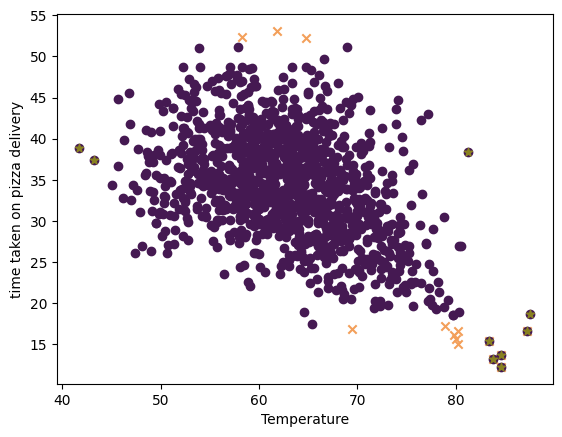

In [6]:
fig, axes = plt.subplots()

_time  = box_parm(df.time)
_temp = box_parm(df.temperature)

_temp_filter = (df.temperature < _temp["lflier"]) | (df.temperature > _temp["rflier"])
_time_filter = (df.time < _time["lflier"]) | (df.time > _time["rflier"])

_time_ifilter = ~_time_filter
_temp_ifilter = ~_temp_filter

axes.scatter(df[_time_filter].temperature, df[_time_filter].time, color="#F39F5A", marker='x')

axes.scatter(df[_time_ifilter | _temp_filter].temperature, df[_time_ifilter | _temp_filter].time, color="#451952")
axes.scatter(df[_temp_filter].temperature, df[_temp_filter].time, color="#898121", marker='*')

axes.set_ylabel("time taken on pizza delivery")
axes.set_xlabel("Temperature")
plt.show()

In [9]:
df[_time_filter | _temp_filter].sort_values("time")

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
520,Tuesday,13-May-14,12.266028,Melissa,East,Bruno,84.622262,11.9,1,0,0,0
258,Tuesday,06-May-14,13.279918,Melissa,East,Bruno,83.788301,10.6,1,0,0,0
770,Monday,19-May-14,13.682296,Laura,East,Bruno,84.579255,9.1,1,0,0,1
732,Sunday,18-May-14,15.093270,Melissa,East,Domenico,80.201535,26.3,1,0,0,1
195,Sunday,04-May-14,15.393721,Laura,East,Domenico,83.364729,24.6,1,0,0,1
768,Monday,19-May-14,15.679746,Laura,East,Bruno,80.034217,15.9,2,0,0,0
215,Monday,05-May-14,16.126727,Laura,East,Bruno,79.781581,28.9,1,0,0,0
543,Wednesday,14-May-14,16.593115,Laura,West,Mario,80.248131,12.7,1,0,0,0
72,Friday,02-May-14,16.688673,Laura,East,Mario,87.253269,10.8,1,0,0,0
482,Monday,12-May-14,16.892082,Laura,East,Salvatore,69.501006,18.6,1,0,0,0


In [14]:
df_n = df[_time_ifilter]

In [15]:
df_n.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0


In [16]:
df_n.shape

(1252, 12)

In [17]:
df_n.describe()

,time,temperature,bill,pizzas,free_wine,got_wine,discount_customer
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,34.351433,62.706490,42.965176,3.027157,0.180511,0.147764,0.217252
std,6.184354,6.713606,10.979073,1.459027,0.384766,0.355007,0.412541
min,17.426534,41.758718,12.000000,1.000000,0.000000,0.000000,0.000000
25%,30.166651,58.228343,35.600000,2.000000,0.000000,0.000000,0.000000
50%,34.423725,62.884633,43.000000,3.000000,0.000000,0.000000,0.000000
75%,38.593601,67.120597,50.525000,4.000000,0.000000,0.000000,0.000000
max,51.172090,87.582422,75.000000,11.000000,1.000000,1.000000,1.000000
